### Red Neuronal para detectar mi rostro en imagenes

In [92]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size,output_size=1):
        self.total_layers = [input_size] + [hidden_size, 32] + [output_size]
        weights = []
        derivatives = []

        for i in range(len(self.total_layers) - 1):
            currentWeight = np.random.normal(scale = 0.5, size = (self.total_layers[i], self.total_layers[i+1])) 
            currentDerivative = np.zeros((self.total_layers[i], self.total_layers[i+1]))
            weights.append(currentWeight)
            derivatives.append(currentDerivative)

        self.weights = weights
        self.derivatives = derivatives

        activations = []
        for i in range(len(self.total_layers)):
            a = np.zeros((1, self.total_layers[i]))
            activations.append(a)
        self.activations = activations
    
    def forward(self,inputs):
        inputs = np.array(inputs, dtype='float64')
        self.activations[0] = inputs
        z = np.dot(inputs,self.weights[0])
        a = self.sigmoid(z)
        self.activations[1] = a
        for i in range(len(self.total_layers) - 2):
            z = np.dot(a,self.weights[i+1])
            a = self.sigmoid(z)
            self.activations[i + 2] = a
        return self.activations[-1]
    
    def relu(self, x):
        return np.maximum(0, x)
    
    def relu_der(self, x):
        return np.where(x > 0, 1.0, 0.0)

    def sigmoid(self,z):
        return 1/(1 + np.exp(-z))
    
    def sigmoid_der(self,z):
        return z * (1 - z)
    
    def mse(self, predictedValue, expectedValue):
        return np.mean((predictedValue - expectedValue) ** 2)/2
    
    def accuracy(self, x, y):
        predictions = self.forward(x) > 0.5  # Umbral para clasificación
        return np.mean(predictions == y)
    
    def backProp(self, error):
        back = list(range(len(self.total_layers) - 1))
        back.reverse()
        for i in back:
            a = self.activations[i + 1]
            delta = error * self.sigmoid_der(a)
            current_a = self.activations[i]
            d = np.dot(current_a.T, delta)
            self.derivatives[i] = d
            error = np.dot(delta,self.weights[i].T)

            current_a = self.activations[i]
            d = np.dot(current_a.T, delta)
            self.derivatives[i] = d
            error = np.dot(delta, self.weights[i].T)
    
    def gradient_descent(self,learning_rate):
        for i in range(len(self.weights)):
            w = self.weights[i]
            d = self.derivatives[i]
            w -= d * learning_rate
            self.weights[i] = w

    def train(self, x, y, learning_rate, max_error, max_epochs):
        err_mse = 1
        errors = []
        epoch = 0
        while err_mse > max_error and epoch < max_epochs:
            output = self.forward(x)
            error = output - y
            self.backProp(error)
            self.gradient_descent(learning_rate)
            err_mse = self.mse(output,y)
            errors.append(err_mse) 
            print(f"epoca {epoch + 1} de {max_epochs} error actual {err_mse}")
            epoch += 1
        if err_mse <= max_error:
            print(f"Entrenamiento finalizado: error mínimo alcanzado ({err_mse:.5f}) en {epoch} épocas.")
        elif epoch >= max_epochs:
            print(f"Entrenamiento detenido: se alcanzó el máximo de {max_epochs} épocas.")
        return errors



In [82]:
from utilities.ImageProcessor import ImageProcessor
from PIL import Image
processor = ImageProcessor()
dataset = processor.batch_processing('/home/gasallinas/Documents/Clases/IA/finalProject/images/todas_imagenes/','/home/gasallinas/Documents/Clases/IA/finalProject/images/black_white_images/')
# not_my_image_dataset = processor.batch_processing('/home/gasallinas/Documents/Clases/IA/finalProject/images/otro/','/home/gasallinas/Documents/Clases/IA/finalProject/images/black_white_images/',0)
dataset





Se insertaron 65 imagenes


[(array([0.08235294, 0.10196078, 0.10588235, ..., 0.01568627, 0.01568627,
         0.01568627]),
  0),
 (array([0.03137255, 0.02745098, 0.02745098, ..., 0.02352941, 0.02352941,
         0.02745098]),
  1),
 (array([0.01568627, 0.01568627, 0.01568627, ..., 0.01176471, 0.01176471,
         0.01176471]),
  0),
 (array([0.62745098, 0.63529412, 0.61176471, ..., 0.55686275, 0.55294118,
         0.54509804]),
  1),
 (array([0.56078431, 0.56470588, 0.56470588, ..., 0.32156863, 0.2745098 ,
         0.28235294]),
  1),
 (array([0.3254902 , 0.21960784, 0.17254902, ..., 0.45098039, 0.48627451,
         0.50980392]),
  1),
 (array([0.43137255, 0.43137255, 0.43137255, ..., 0.10588235, 0.09803922,
         0.09803922]),
  0),
 (array([0.2745098 , 0.2745098 , 0.2745098 , ..., 0.94509804, 0.94901961,
         0.94901961]),
  0),
 (array([0.37647059, 0.37647059, 0.38039216, ..., 0.10196078, 0.10588235,
         0.10588235]),
  0),
 (array([0.77254902, 0.79215686, 0.79607843, ..., 0.54117647, 0.54117647,

epoca 1 de 300 error actual 0.15145030076090052
epoca 2 de 300 error actual 0.13624525865496653
epoca 3 de 300 error actual 0.12874141355594582
epoca 4 de 300 error actual 0.12490084407658233
epoca 5 de 300 error actual 0.122142209344672
epoca 6 de 300 error actual 0.12016628733946251
epoca 7 de 300 error actual 0.11754689128154933
epoca 8 de 300 error actual 0.11465734693362561
epoca 9 de 300 error actual 0.11257907170315937
epoca 10 de 300 error actual 0.110470752745846
epoca 11 de 300 error actual 0.11091559700445995
epoca 12 de 300 error actual 0.10758900295673124
epoca 13 de 300 error actual 0.1074082398156919
epoca 14 de 300 error actual 0.10517956345579807
epoca 15 de 300 error actual 0.10792210237038587
epoca 16 de 300 error actual 0.10427065169338137
epoca 17 de 300 error actual 0.10345958222342165
epoca 18 de 300 error actual 0.10221514213583835
epoca 19 de 300 error actual 0.09916578239649895
epoca 20 de 300 error actual 0.09809731708416644
epoca 21 de 300 error actual 0.095

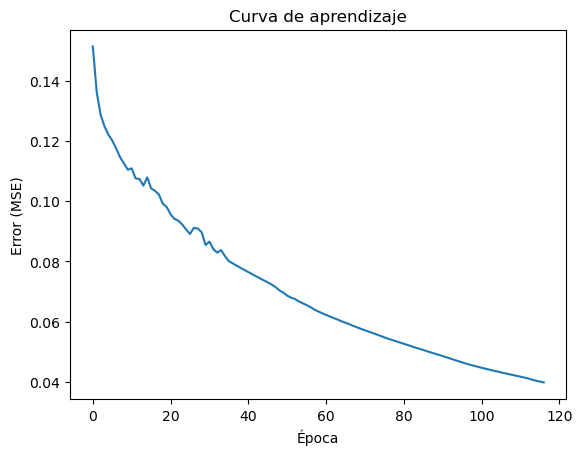

In [103]:
# instanciando el modelo y preparando dataset
network = NeuralNetwork(input_size=700*600, hidden_size=64,output_size=1)

x = [tupla[0] for tupla in dataset]
y = [tupla[1] for tupla in dataset]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
y_train = np.array(y_train).reshape(-1, 1)

errors = network.train(x_train,y_train,0.01, 0.04,300)

plt.plot(errors)
plt.xlabel("Época")
plt.ylabel("Error (MSE)")
plt.title("Curva de aprendizaje")
plt.show()
# batch_size = 5
# epochs = 100
# for j in range(epochs):
#     print(f"procesando epoch {j+1}/{epochs}")
#     for i in range(0, len(x_train), batch_size):
#         x_batch = x_train[i:i+batch_size]
#         y_batch = y_train[i:i+batch_size]
#         network.train(x_batch, y_batch,0.01, 0.05)


In [ ]:
# def train(model, x_train, y_train,batch_size, epochs=100, lr=0.01):

#     for epoch in range(epochs):
#         print(f"\nEpoch {epoch+1}/{epochs}")
#         for i in range(0, len(x_train), batch_size):
#             x_batch = x_train[i:i+batch_size]
#             y_batch = y_train[i:i+batch_size]
#             # Entrenar 1 vez por lote (no múltiples épocas)
#             network.train(x_batch, y_batch, 0.01, 0.05)  
        
#         # Opcional: Calcular métricas después de cada época
#         epoch_acc = network.accuracy(x_train, y_train)
#         print(f"Epoch {epoch+1} - Accuracy: {epoch_acc:.2%}")
#         #early stop si no hay mejora
#         if epoch > 50 and (loss_history[-50] - loss) < 1e-5:
#             print(f"stop en epoch {epoch}")
#             break
        
#         if epoch % 100 == 0:
#             print(f"Epoch {epoch}, Loss: {loss:.4f}")

In [104]:
# evaluando
y_pred = [network.forward(xi) > 0.5 for xi in x_test]
accuracy = np.mean(y_pred == np.array(y_test).reshape(-1, 1))
print(f"Precisión en test: {accuracy:.2%}")

Precisión en test: 69.23%


In [106]:
def predict(model,imagePath):
    processor = ImageProcessor()
    image = Image.open(imagePath)
    resized_image = processor.resize_black_and_white(image)
    pixel_vector = processor.image_to_vector(resized_image)
    pred = model.forward(pixel_vector)
    prob = float(pred)
    return f" {prob:.2%}, {'es gerardo' if prob > 0.60 else 'no es gerardo'}"

# si es gerardo
# predict(network,'/home/gasallinas/Documents/Clases/IA/finalProject/images/objetivo/photo_2025-08-02_18-51-58.jpg')
# no es gerardo
predict(network,'/home/gasallinas/Documents/Clases/IA/finalProject/images/otro/cillianMurphy.jpg')

/tmp/ipykernel_171482/3131519889.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prob = float(pred)


' 3.55%, no es gerardo'